# Image manipulation and processing using Numpy and Scipy
Defining and manipulating patches was a bit problematic with `pillow` so instead I'm going to try and follow [this tutorial](https://scipy-lectures.org/advanced/image_processing/) to use `Scipy`, `NumPy`, and `Matplotlib`, because I believe that treating images as arrays will make handling patches much easier

In [2]:
from scipy import misc, ndimage
import matplotlib.pyplot as plt
import imageio
import numpy as np

In [3]:
cat = imageio.imread("cat.png")

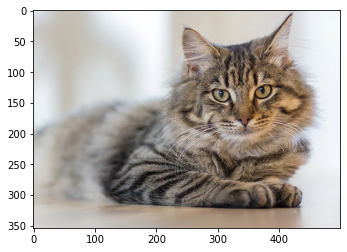

((354, 500, 4), dtype('uint8'))

In [4]:
plt.imshow(cat)
plt.show()
cat.shape, cat.dtype

Increase contrast by setting min and max values:

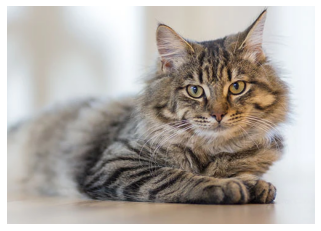

In [5]:
plt.imshow(cat, cmap=plt.cm.gray, vmin=30, vmax=200) 
plt.axis('off')
plt.show() 

In [6]:
def imshow(image):
    plt.imshow(image)
    plt.axis('off')
    plt.show

## Geometrical transformations

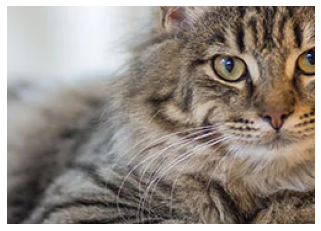

In [7]:
# cropping
w, h = cat.shape[:2]
crop_cat = cat[w//4:-w//4,h//4:-h//4]
imshow(crop_cat)


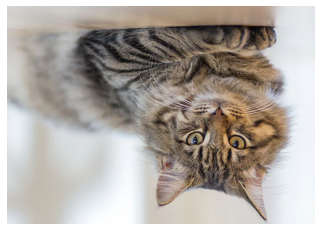

In [8]:
# up <-> down flip
flip_ud_cat = np.flip(cat, 0)
imshow(flip_ud_cat)

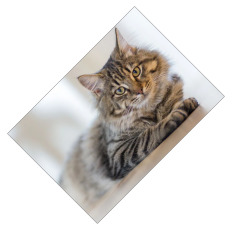

In [9]:
# rotation
rotate_cat = ndimage.rotate(cat, 45)
rotate_face_noreshape = ndimage.rotate(cat, 45, reshape=False)

imshow(rotate_cat)

# Experimenting with test type modifications

imageio.core.util.Array

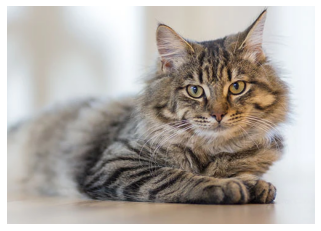

In [95]:
cat = imageio.imread("cat.png")
imshow(cat)
type(cat)

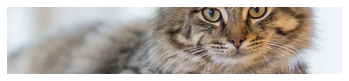

In [11]:
def crop_image(image:imageio.core.util.Array, dims):
    
    h, w = image.shape[:2]
    assert dims < (h,w), "New dimensions have to be smaller for cropping to be possible"
    crop = image[(h-dims[0])//2:h-(h-dims[0])//2, (w-dims[1])//2:w-(w-dims[1])//2]
    
    return crop

imshow(crop_image(cat, (100,500)))

(354, 500, 4) (354, 354, 4)


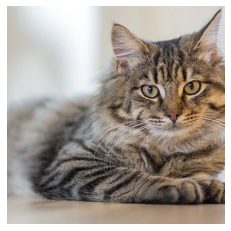

In [12]:
def square_image(image:imageio.core.util.Array):
    if image.shape[0] > image.shape[1]:
        squared = crop_image(image, (image.shape[1], image.shape[1]))
    elif image.shape[0] < image.shape[1]:
        squared = crop_image(image, (image.shape[0], image.shape[0]))
    print(image.shape, squared.shape)
    assert squared.shape[0] == squared.shape[1], "Error: Image wasn't squared correctly"
    return squared

square_cat = square_image(cat)
IMAGE_SIZE = square_cat.shape[0]
imshow(square_cat)

## Crop image into patches

In [13]:
PATCH_SIZE = 50


In [14]:
print(IMAGE_SIZE)

if IMAGE_SIZE%PATCH_SIZE != 0:
    IMAGE_SIZE = IMAGE_SIZE//PATCH_SIZE*PATCH_SIZE
    square_cat = crop_image(square_cat, (IMAGE_SIZE, IMAGE_SIZE))

square_cat.shape

354


(350, 350, 4)

In [50]:
PATCH_PER_SIDE = IMAGE_SIZE//PATCH_SIZE

In [61]:
assert len(square_cat.shape) == 3
patches = np.zeros((PATCH_PER_SIDE, PATCH_PER_SIDE, PATCH_SIZE, PATCH_SIZE, square_cat.shape[2]), dtype=int)
for i,y in enumerate(range(0,IMAGE_SIZE, PATCH_SIZE)):
    for j,x in enumerate(range(0,IMAGE_SIZE,PATCH_SIZE)):
        patches[i,j] = square_cat[y:y+50, x:x+50]


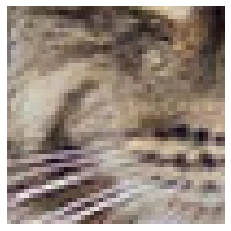

In [52]:
imshow(patches[3,4])

## Visualize these patches

In [53]:
def show_patches(patches, PATCH_PER_SIDE, span=0, label=False):

    fig, ax = plt.subplots(PATCH_PER_SIDE, PATCH_PER_SIDE, figsize=(5, 5))

    for idy in range(PATCH_PER_SIDE):
        for idx in range(PATCH_PER_SIDE):
            ax[idy, idx].imshow(patches[idy, idx])
            ax[idy, idx].axis('off')
            if label:
                ax[idy, idx].text(0,25, f"{idy}, {idx}", color='red', weight='bold')


    fig.subplots_adjust(wspace=0, hspace=0)
    fig.tight_layout()


    plt.subplots_adjust(wspace=span, hspace=span)

    

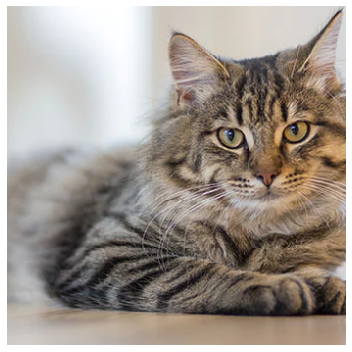

In [65]:
show_patches(patches, PATCH_PER_SIDE)

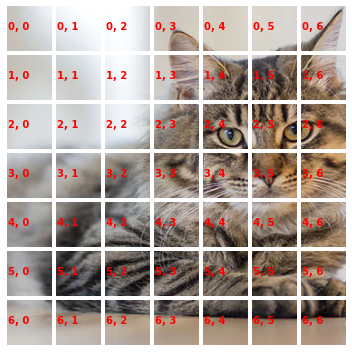

In [55]:
show_patches(patches, PATCH_PER_SIDE, span=0.1, label=True)

## Random perturbation

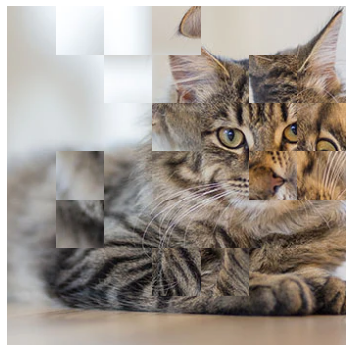

In [67]:
ROT_PROPORTION = 0.25

from random import random

rotated_patches = patches.copy()

for idy in range(PATCH_PER_SIDE):
    for idx in range(PATCH_PER_SIDE):
        if random() <= ROT_PROPORTION:
            rotated_patches[idy, idx] = np.rot90(patches[idy, idx])

show_patches(rotated_patches, PATCH_PER_SIDE)

## Perturbation by clumps
### Central Rotation

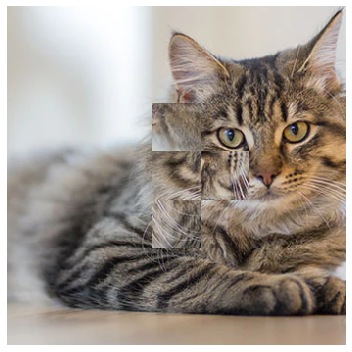

In [73]:
ROT_PROPORTION = 0.25

rotated_patches = patches.copy()

for idy in range(PATCH_PER_SIDE):
    for idx in range(PATCH_PER_SIDE):
        if (PATCH_PER_SIDE-1)/4 <= idy < (PATCH_PER_SIDE-1)*3/4 and (PATCH_PER_SIDE-1)/4 <= idx < (PATCH_PER_SIDE-1)*3/4:
            if random() <= ROT_PROPORTION:
                rotated_patches[idy, idx] = np.rot90(patches[idy, idx])

show_patches(rotated_patches, PATCH_PER_SIDE)


### Outer Rotation

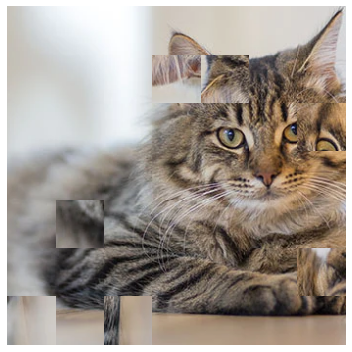

In [75]:
ROT_PROPORTION = 0.25

rotated_patches = patches.copy()

for idy in range(PATCH_PER_SIDE):
    for idx in range(PATCH_PER_SIDE):
        if not ((PATCH_PER_SIDE-1)/4 <= idy < (PATCH_PER_SIDE-1)*3/4 and (PATCH_PER_SIDE-1)/4 <= idx < (PATCH_PER_SIDE-1)*3/4):
            if random() <= ROT_PROPORTION:
                rotated_patches[idy, idx] = np.rot90(patches[idy, idx])

show_patches(rotated_patches, PATCH_PER_SIDE)
